In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
customer = pd.read_csv('Customer_Segmentation_py.csv')
customer

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12/04/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,02/04/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,02/04/2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,04/03/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [32]:
customer.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [33]:
customer.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


1.What is the distribution of customers across different age group('Age_Group')?

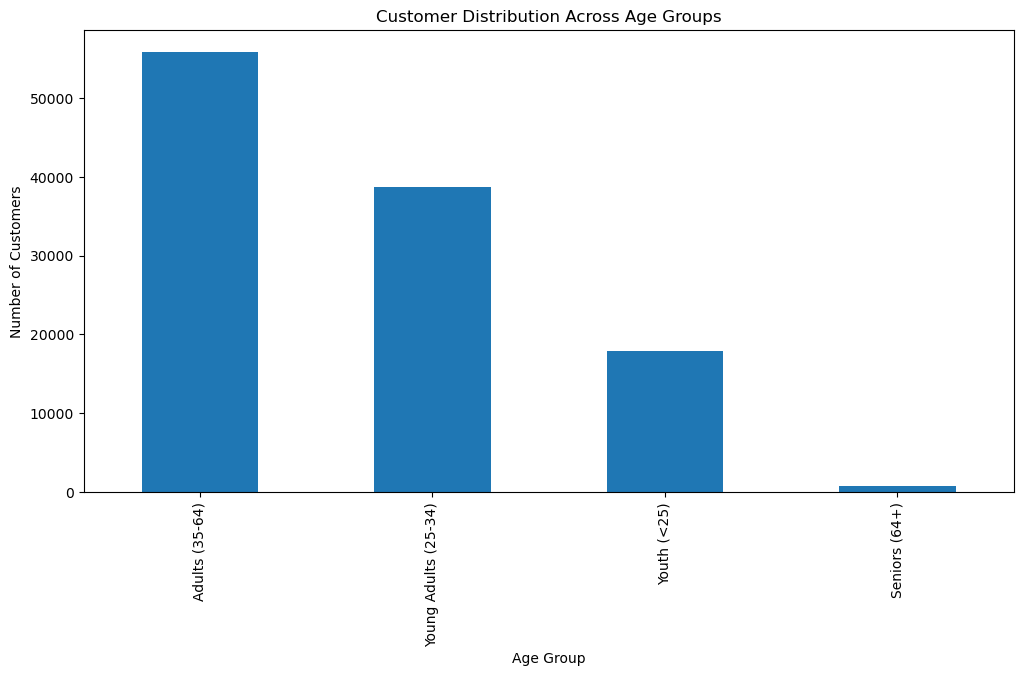

In [35]:
age = customer['Age_Group'].value_counts() 
age.plot(kind='bar') 
plt.title('Customer Distribution Across Age Groups') 
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

2.How does Customer_Gender vary across different countries or states?

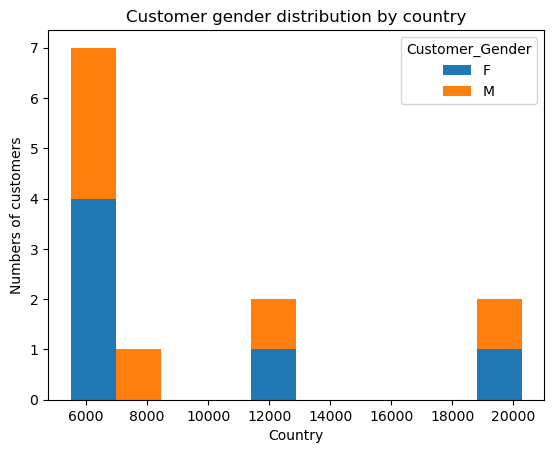

In [37]:
gender = customer.groupby(['Country','Customer_Gender',]).size().unstack()
gender.plot(kind='hist',stacked=True)
plt.title('Customer gender distribution by country')
plt.xlabel('Country')
plt.ylabel('Numbers of customers')
plt.show()

3.What is the most popular product_Category and sub_category in terms of order_quantity?

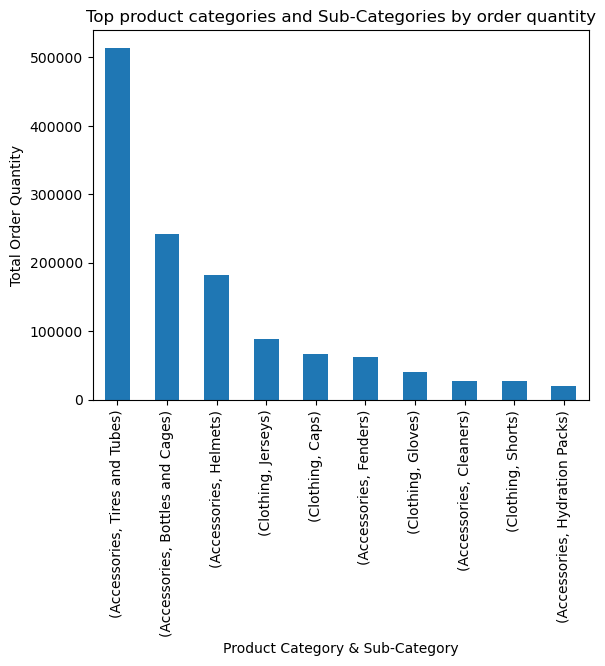

In [39]:
popular = customer.groupby(['Product_Category','Sub_Category'])['Order_Quantity'].sum()
popular = popular.sort_values(ascending=False)

popular.head(10).plot(kind='bar')
plt.title('Top product categories and Sub-Categories by order quantity')
plt.ylabel('Total Order Quantity')
plt.xlabel('Product Category & Sub-Category')

plt.show()


4.Can we segment customers based on their purchasing behavior(e,g.,Order_Quantity,Profit,Revenue)?
5.What are the characteristics of each customer cluster?

In [41]:
from sklearn.cluster import KMeans #This imports the KMeans clustering algorithm, which partitions data into k clusters by minimizing the variance within each cluster.
from sklearn.preprocessing import StandardScaler #This imports a tool to standardize features by removing the mean and scaling to unit variance, which is important for clustering and PCA to work properly.
from sklearn.decomposition import PCA #This imports Principal Component Analysis, a dimensionality reduction technique that projects data into a lower-dimensional space while preserving as much variance as possible.

In [42]:
features = customer[['Order_Quantity','Profit','Revenue']]
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)  #Standardizes the features so they all have a mean of 0 and standard deviation of 1. This is important because KMeans is distance-based and sensitive to feature scaling.
kmeans=KMeans(n_clusters=3,random_state=42) #Initializes the KMeans algorithm with 3 clusters.
customer['Cluster']=kmeans.fit_predict(scaled_features)
#Fits the model to the standardized data and assigns a cluster label to each customer, storing it in a new column Cluster.

In [43]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_features)

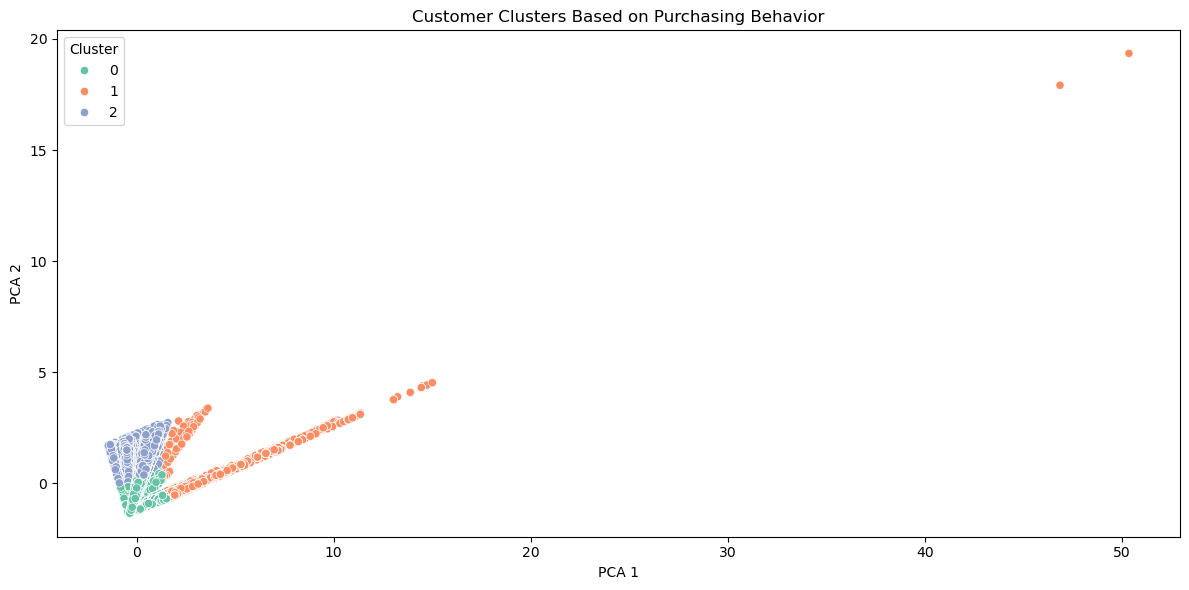

In [45]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer['Cluster'], palette='Set2')
plt.title('Customer Clusters Based on Purchasing Behavior')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [124]:
customer

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Cluster
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,1
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,0
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,2
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,2
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,2


In [47]:
cluster_summary = customer.groupby('Cluster')[['Order_Quantity', 'Profit', 'Revenue']].mean().round(2)
print(cluster_summary) #This shows the average values of the main features per cluster.



         Order_Quantity   Profit  Revenue
Cluster                                  
0                  5.39   136.97   393.36
1                  1.75  1253.29  3627.97
2                 21.84   187.13   376.96


In [48]:
cluster_counts = customer['Cluster'].value_counts().sort_index()
cluster_summary['Count'] = cluster_counts
print(cluster_summary) #This tells you how many customers are in each cluster, helping you spot small or dominant segments.



         Order_Quantity   Profit  Revenue  Count
Cluster                                         
0                  5.39   136.97   393.36  52616
1                  1.75  1253.29  3627.97  12857
2                 21.84   187.13   376.96  47563


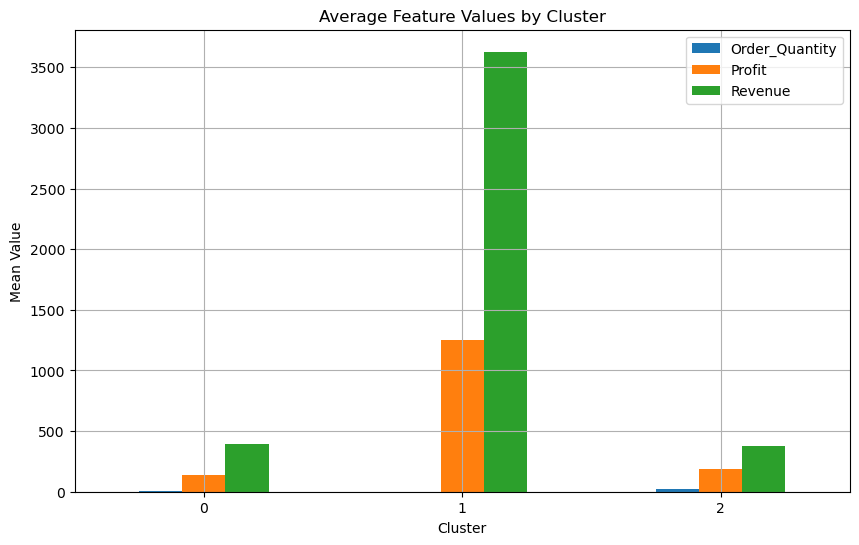

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_summary.drop(columns='Count').plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values by Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\2771734067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=customer, palette='viridis')


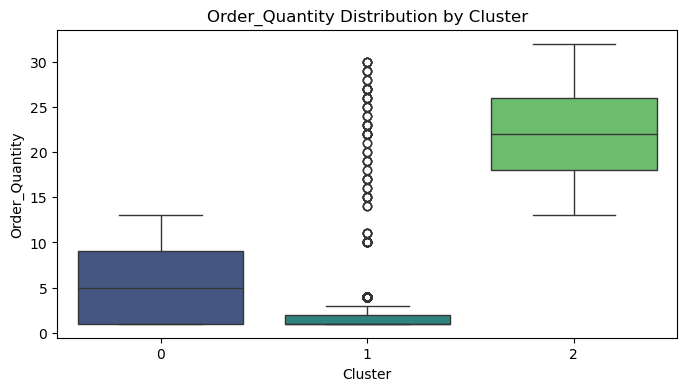

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\2771734067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=customer, palette='viridis')


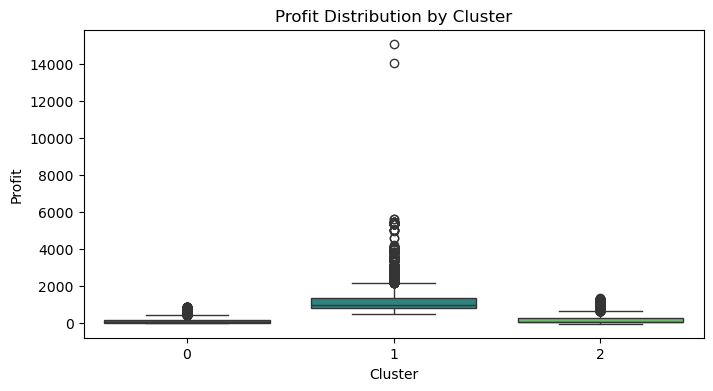

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\2771734067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=customer, palette='viridis')


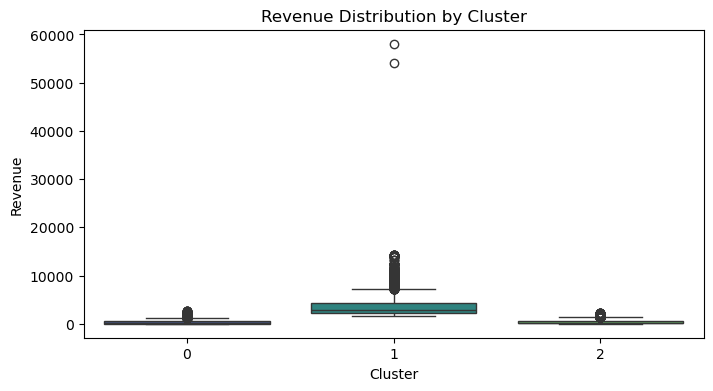

In [50]:
for feature in ['Order_Quantity', 'Profit', 'Revenue']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=customer, palette='viridis')
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()

In [140]:
#Elbow Method to find the optimal number of clusters for your customer segmentation:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

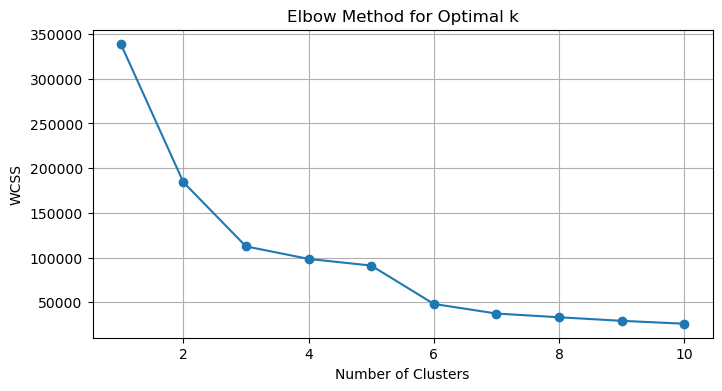

In [142]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [55]:
print(customer[['Order_Quantity', 'Profit', 'Revenue']].isnull().sum())

Order_Quantity    0
Profit            0
Revenue           0
dtype: int64


In [56]:
customer = customer.dropna(subset=['Order_Quantity', 'Profit', 'Revenue'])

6.Which product_category or sub_Category generates the highest profit and reveneu?

In [58]:
profitability = customer.groupby(['Product_Category','Sub_Category'])[['Profit','Revenue']].sum().sort_values(by='Profit',ascending=False)
print(profitability.head(10))

                                      Profit   Revenue
Product_Category Sub_Category                         
Bikes            Road Bikes         10078875  33363061
                 Mountain Bikes      8160463  21123526
Accessories      Helmets             3380203   5741081
                 Tires and Tubes     2727713   4670902
Bikes            Touring Bikes       2279938   7295547
Clothing         Shorts              1034342   1740710
Accessories      Bottles and Cages    810598   1409174
                 Fenders              748914   1245733
Clothing         Jerseys              603568   4113742
Accessories      Hydration Packs      572668    990406


7.Analyze the relationship between Unit_Cost,Unit_price and profit

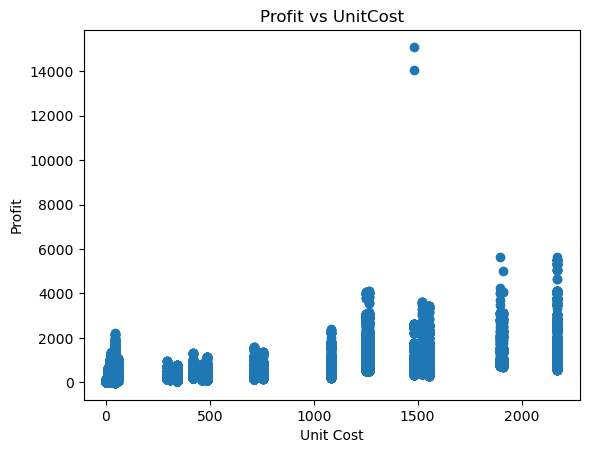

In [60]:
plt.scatter(customer['Unit_Cost'],customer['Profit'])
plt.title('Profit vs UnitCost')
plt.xlabel('Unit Cost')
plt.ylabel('Profit')
plt.show()

8.Which Age_Group contributes most to Revenue and Profit?

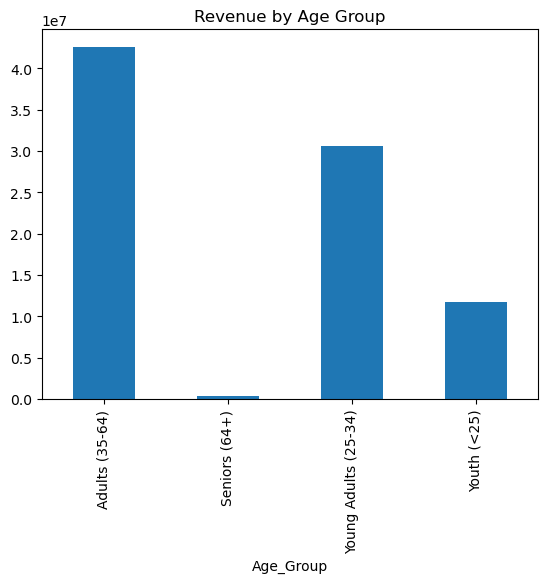

In [62]:
age_group_revenue = customer.groupby('Age_Group')['Revenue'].sum()
age_group_revenue.plot(kind='bar')
plt.title('Revenue by Age Group')
plt.show()

9.How does customer spending (Revenue) differ between Customer_Gender groups?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\2486463206.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer['Date']=pd.to_datetime(customer['Date'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\2486463206.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  revenue_trends = customer.resample('M',on='Date')[['Revenue','Profit']].sum()


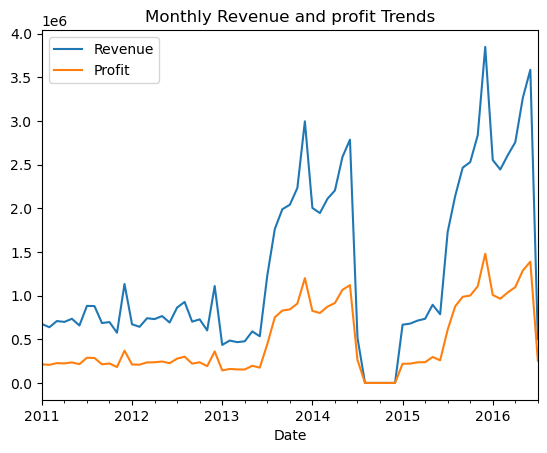

In [64]:
customer['Date']=pd.to_datetime(customer['Date'])
revenue_trends = customer.resample('M',on='Date')[['Revenue','Profit']].sum()
revenue_trends.plot()
plt.title('Monthly Revenue and profit Trends')
plt.show()

10.Analyze the monthly or yearly trends in Revenue and Profit.

In [66]:
customer

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Cluster
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,1
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,0
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,2
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,2
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,2


In [67]:
from sklearn.preprocessing import LabelEncoder


In [68]:
X = customer[['Customer_Age', 'Customer_Gender', 'Unit_Price']].copy()
le = LabelEncoder()
X['Customer_Gender'] = le.fit_transform(X['Customer_Gender'])
y = (customer['Order_Quantity'] > 5).astype(int)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
model.score(X_test,y_test)

0.8561571125265393

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
a=customer[['Unit_Cost','Unit_Price','Order_Quantity']]
b=customer['Profit']
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)
model=LinearRegression()
model.fit(a,b)

LinearRegression()

In [73]:
model.score(a_test,b_test)

0.6119000628154713

11.Visualize the customer distribution by country and state.

In [75]:
import seaborn as sns


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\3145575269.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


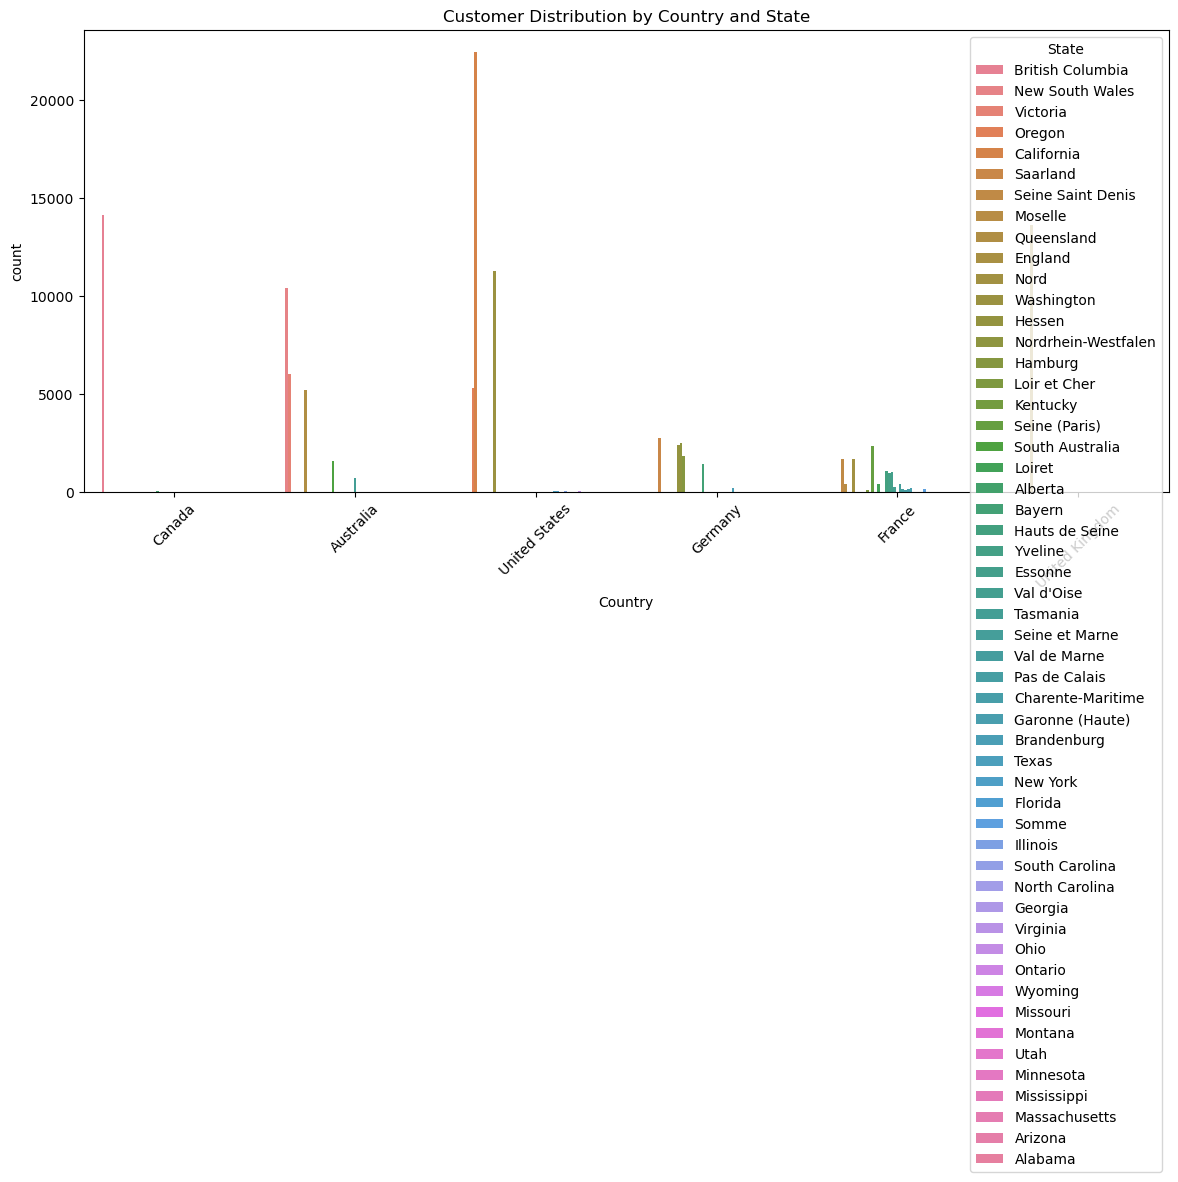

In [76]:
plt.figure(figsize=(14,6))
sns.countplot(data=customer,x='Country', hue='State')
plt.xticks(rotation=45)
plt.title('Customer Distribution by Country and State')
plt.tight_layout()
plt.show()

14.Create a bar chart showing Revenue or Profit for each Product_Category

In [78]:
metric = 'Revenue' if 'Revenue' in customer.columns else 'Profit'

category_data = customer.groupby('Product_Category')[metric].sum().reset_index()
category_data = category_data.sort_values(by=metric, ascending=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1016\3172295930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_data, x='Product_Category', y=metric, palette='coolwarm')


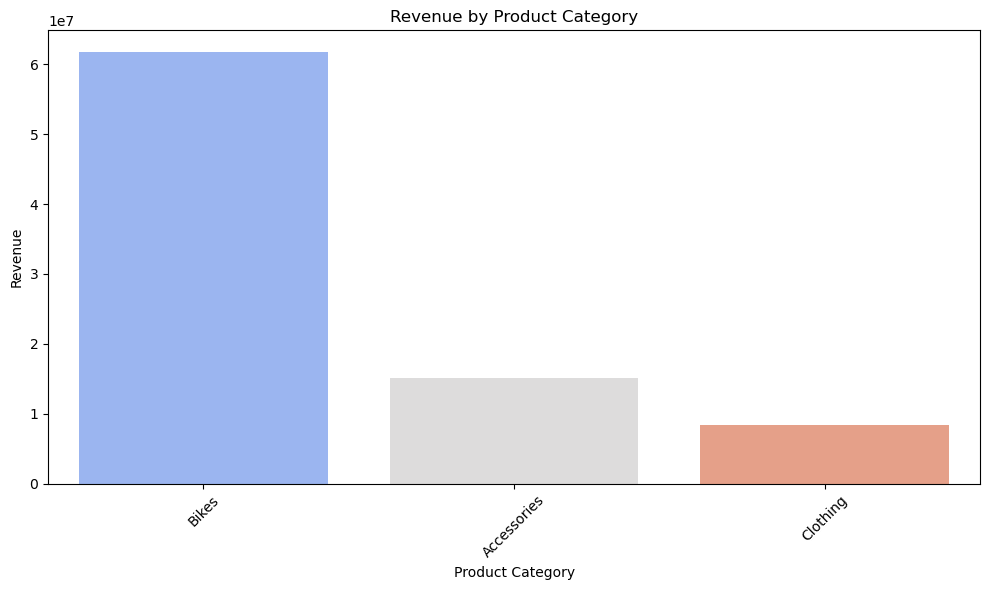

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_data, x='Product_Category', y=metric, palette='coolwarm')
plt.title(f'{metric} by Product Category')
plt.xticks(rotation=45)
plt.ylabel(metric)
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

15. Plot clusters of customers based on purchasing behavior for visual inspection

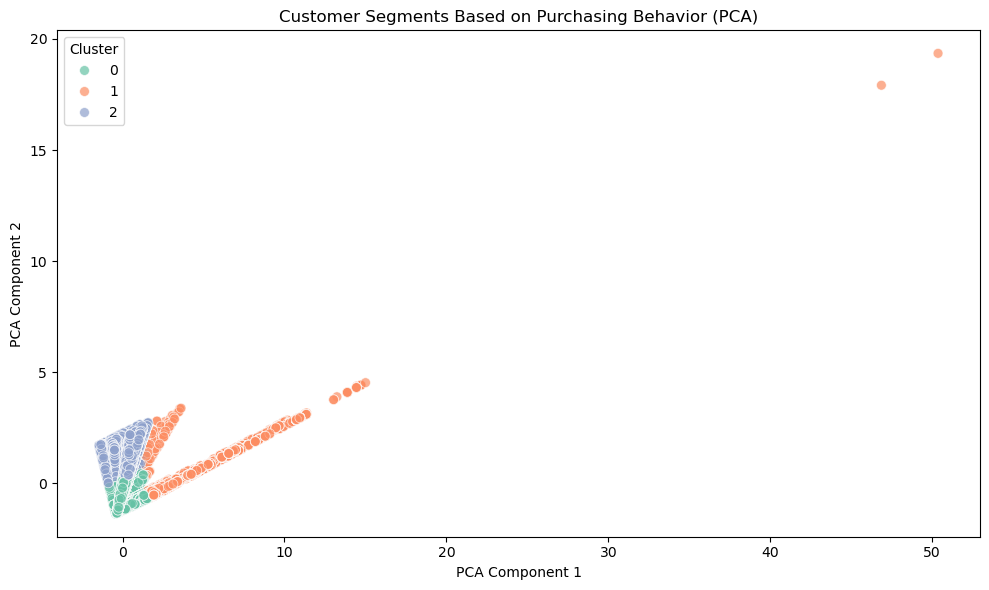

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=50, alpha=0.7)
plt.title('Customer Segments Based on Purchasing Behavior (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

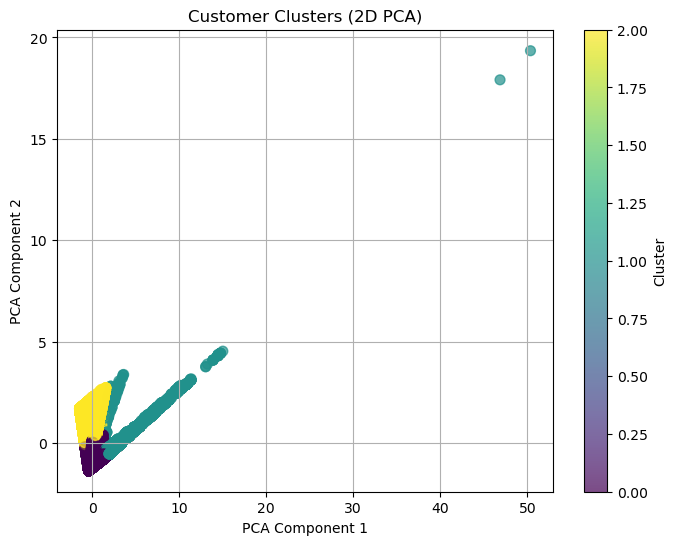

In [146]:

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Clusters (2D PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

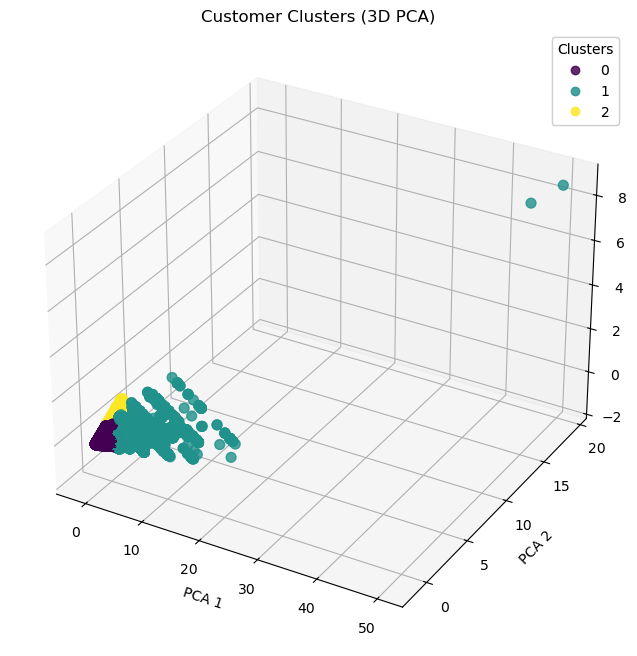

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=customer['Cluster'], cmap='viridis', s=50, alpha=0.8)

ax.set_title('Customer Clusters (3D PCA)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()
